# Projet 07 : Effectuer une prédiction de revenus

---
**Importation des librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import modules_perso.sf_graphiques as sfg

---
## <font color=blue> Mission 4 : Modélisation du revenu des individus </font>

### 4.2.  ANOVA du revenu basée sur le pays de l'individu

In [4]:
data = pd.read_csv("data_analyse01.csv", index_col=0)
data.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,child_income,country_code
0,728.89795,ALB
1,728.89795,ALB
2,728.89795,ALB
3,728.89795,ALB
4,728.89795,ALB


Observons les données graphiquement à l'aide d'un diagramme de dispersion de child_income en fonction du country_code.

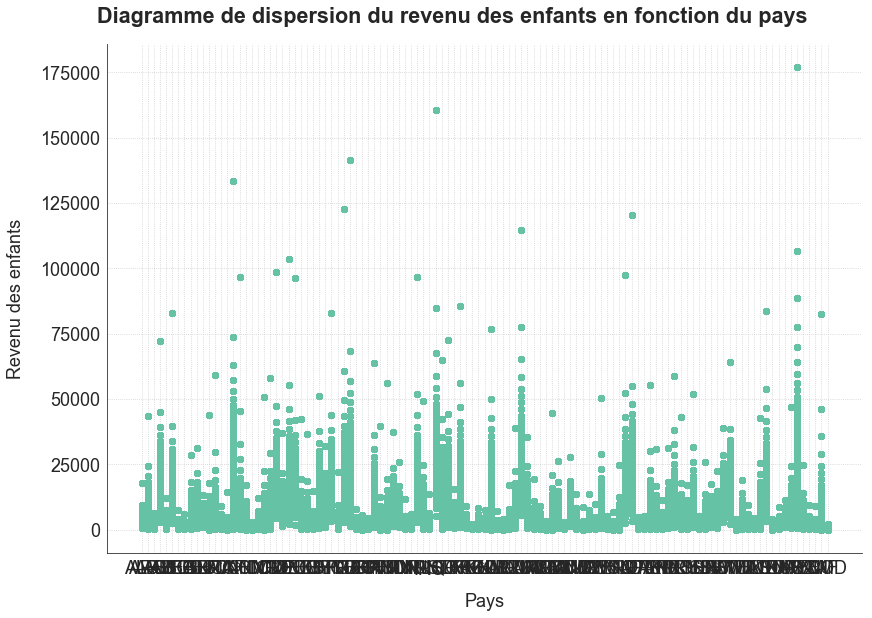

In [5]:
mygraph = sfg.MyGraph("Diagramme de dispersion du revenu des enfants en fonction du pays", is_mono=False)
mygraph.add_plot(data.country_code, data.child_income, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
mygraph.set_axe('x', label="Pays")
mygraph.set_axe('y', label="Revenu des enfants")
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova01_00_diagramme_dispersion.png")
plt.show()

Le nuage de points des revenus des enfants par pays, montre une grande diversité des situations. La dispersion des revenus est très élevée, avec des situations très différentes d'un pays à l'autre. Cette dispersion extrême laisse présager des difficultés de modélisation par un modèle linéaire.

In [6]:
anova = smf.ols(formula="child_income ~ country_code", data=data).fit()

In [7]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 4.911e+04
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:46:06   Log-Likelihood:            -5.7765e+07
No. Observations:             5642420   AIC:                         1.155e+08
Df Residuals:                 5642307   BIC:                         1.155e+08
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2992.6585     30.276     98.847      0.000    2933.320    3051.997
country_code[T.ARG]  2853.1290     42.840     66.599      0.000    2769.163    2937.095
country_code[T.ARM] -1364.7550     42.790    -31.894      0.000   -1448.623   -1280.887
country_code[T.AUT]  1.364e+04     42.793    318.630      0.000    1.36e+04    1.37e+04
country_code[T.AZE]  -634.2290     42.779    -14.826      0.000    -718.074    -550.384
country_code[T.BEL]  1.203e+04     42.782    281.091      0.000    1.19e+04    1.21e+04
country_code[T.BFA] -2075.4329     42.818    -48.471      0.000   -2159.355   -1991.511
country_code[T.BGD] -1995.4607     42.794    -46.629      0.000   -2079.336   -1911.585
country_code[T.BGR]  1990.3787     42.805     46.499      0.000    1906.482    2074.275
country_code[T.BIH]  3336.5923     42.824     77.915      0.000    3252.660    3420.525
country_code[T.BLR]   926.5132     42.792     21.651      0.000     842.641    1010.385
country_code[T.BOL]    20.7179     42.818      0.484      0.628     -63.203     104.639
country_code[T.BRA]  1801.7749     42.793     42.104      0.000    1717.902    1885.648
country_code[T.BTN] -1477.6254     42.794    -34.529      0.000   -1561.500   -1393.751
country_code[T.CAF] -2184.7909     42.795    -51.052      0.000   -2268.668   -2100.914
country_code[T.CAN]  2.075e+04     42.776    485.018      0.000    2.07e+04    2.08e+04
country_code[T.CHL]  4033.5703     42.793     94.257      0.000    3949.697    4117.443
country_code[T.CHN]  -472.3355     42.792    -11.038      0.000    -556.206    -388.465
country_code[T.CIV] -2593.4988     42.789    -60.611      0.000   -2677.364   -2509.633
country_code[T.CMR] -1199.8167     42.807    -28.028      0.000   -1283.717   -1115.916
country_code[T.COD] -2717.0359     42.813    -63.462      0.000   -2800.949   -2633.123
country_code[T.COL]   555.4800     42.834     12.968      0.000     471.527     639.433
country_code[T.CRI]  2576.3771     42.825     60.160      0.000    2492.441    2660.313
country_code[T.CYP]  1.435e+04     42.781    335.482      0.000    1.43e+04    1.44e+04
country_code[T.CZE]  5240.1025     42.792    122.456      0.000    5156.232    5323.973
country_code[T.DEU]  1.506e+04     42.785    352.021      0.000     1.5e+04    1.51e+04
country_code[T.DNK]  1.405e+04     42.774    328.569      0.000     1.4e+04    1.41e+04
country_code[T.DOM]   561.2270     42.810     13.110      0.000     477.320     645.134
country_code[T.ECU]   385.9746     42.827      9.012      0.000     302.036     469.914
country_code[T.EGY] -1025.2896     42.822    -23.943      0.000   -1109.219    -941.360
country_code[T.ESP]  1.011e+04     42.790    236.376      0.000       1e+04    1.02e+04
country_code[T.EST]  4712.9493     42.790    110.142      0.000    4629.083    4796.816
cou

In [8]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
country_code,2.512723e+14,112.0,49106.502289,0.0,0.493611,0.493591
Residual,2.577771e+14,5642307.0,NaN,NaN,NaN,NaN
total,5.090493e+14,5642419.0,NaN,NaN,NaN,NaN


Je note que le R² du modèle, donc la part de dispersion expliquée par le modèle, est faible : environ 50%. Malgré cela, la variable country_code est considérée comme significative par l'ANOVA.  
Avant d'analyser le modèle, il faut vérifier le respect des hypothèses sur la normalité des résidus, la linéarité de la relation et l'homoscédasticité.

### Vérification des hypothèses

**Hypothèse 1 : Normalité des résidus**

In [9]:
alpha_normalite = 0.05
ad_stat, ad_pvalue = sm.stats.normal_ad(anova.resid)
norm_stat, norm_pvalue = st.kstest(anova.resid, cdf='norm', args=(anova.resid.mean(), anova.resid.var(ddof=1)))
jb_stat, jb_pvalue, skw, kurt = sm.stats.stattools.jarque_bera(anova.resid)
df_normalite = pd.DataFrame({'H0':np.repeat("Distribution normale",3), 'Statistique':["{:.2f}".format(ad_stat),"{:.2f}".format(norm_stat),"{:.2f}".format(jb_stat)], \
                             'p-value':["{:.3f}".format(ad_pvalue),"{:.3f}".format(norm_pvalue),"{:.3f}".format(jb_pvalue)]}, index=["Anderson-Darling","Kolmogorov-Smirnov","Jarque-Bera"])
inter_col = "Résultat (seuil={:.1%})".format(alpha_normalite)
df_normalite[inter_col] = ["Normalité acceptée" if float(pval)>=alpha_normalite else "Normalité rejetée" for pval in df_normalite["p-value"]]
df_normalite

C:\Anaconda3\envs\Jupyter\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
C:\Anaconda3\envs\Jupyter\lib\site-packages\statsmodels\stats\_adnorm.py:66: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


,H0,Statistique,p-value,Résultat (seuil=5.0%)
Anderson-Darling,Distribution normale,inf,0.000,Normalité rejetée
Kolmogorov-Smirnov,Distribution normale,0.50,0.000,Normalité rejetée
Jarque-Bera,Distribution normale,1944115009.61,0.000,Normalité rejetée


Aucun des trois test n'accepte la normalité. Nous avons un grand nombre d'observations. Une symétrie de la distribution des résidus sera suffisante. Je vérifie graphiquement cette symétrie, et je trace également la droite de Henry.

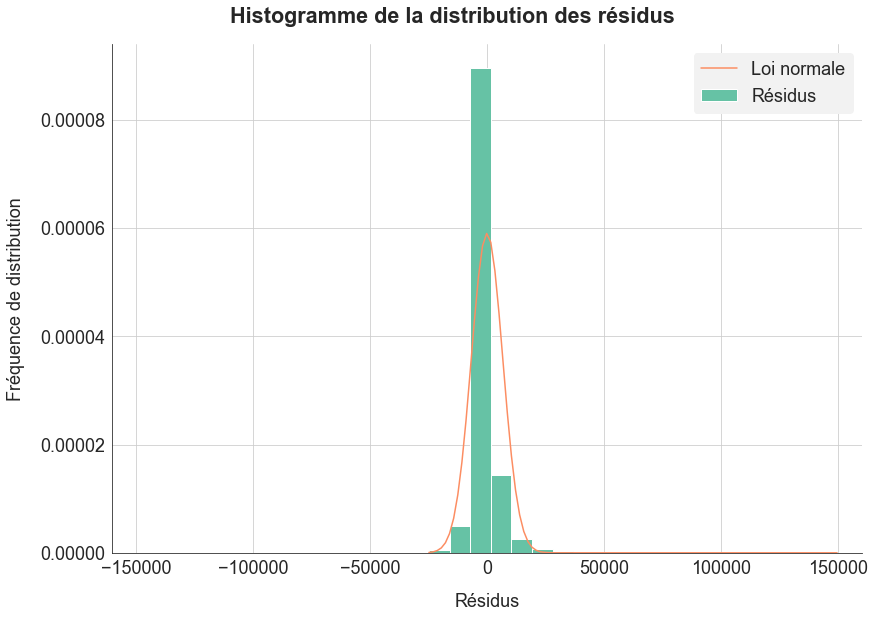

In [10]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova01_01_distribution_residus.png")
plt.show()

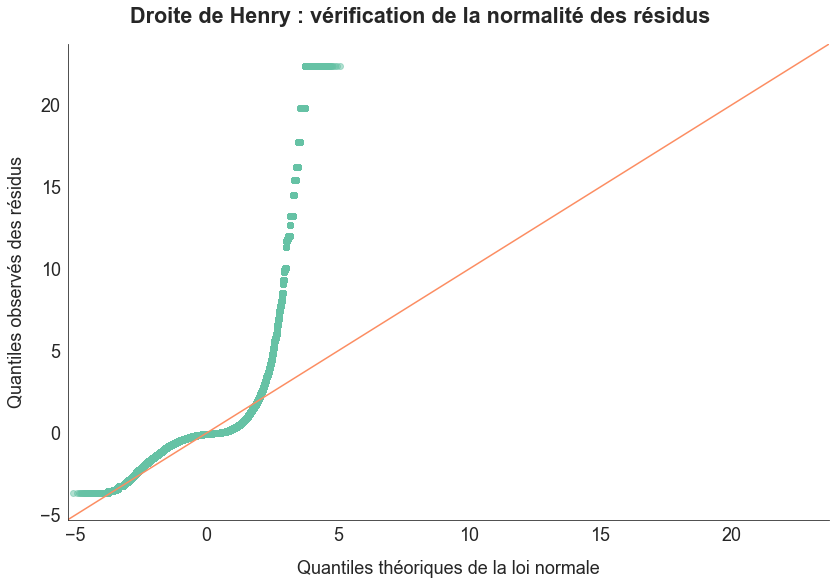

In [11]:
mygraph = sfg.MyGraph("Droite de Henry : vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova01_02_droite_henry.png")
plt.show()

On remarque que les résidus ne sont pas normaux. Ils sont sur-représentés dans les valeurs élevées. Cela s'explique par la non-linéarité de la relation. La droite de Henry prend une forme assez proche d'une courbe exponentielle. De ce fait, étudier le logarithme des revenus devrait permettre de linéariser la relation et d'avoir un modèle plus pertinent.

**Hypothèse 2 : Linéarité et additivité de la relation  
Hypothèse 3 : Homoscédasticité des résidus**

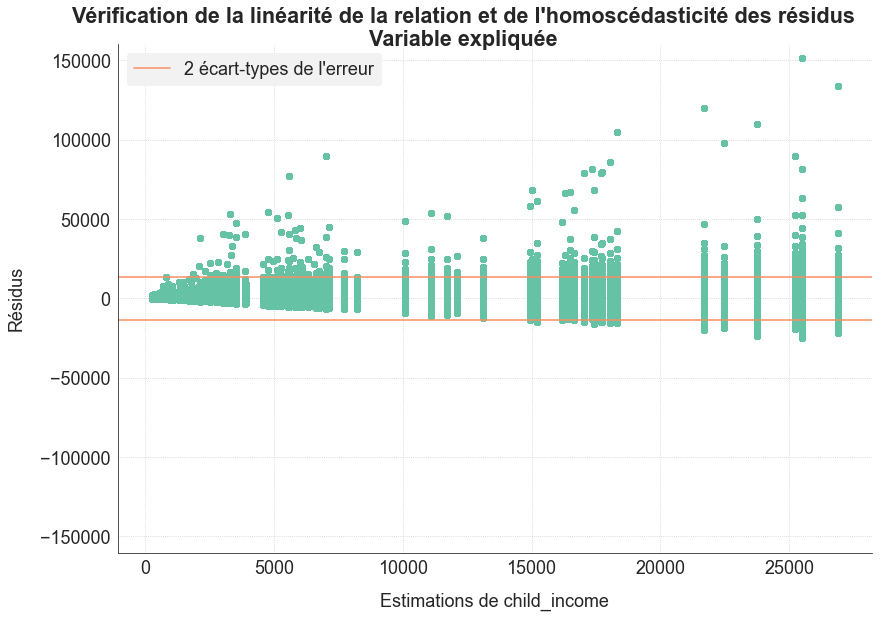

In [12]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimations de child_income")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova01_03_linearite_homoscedasticite_endo.png")
plt.show()

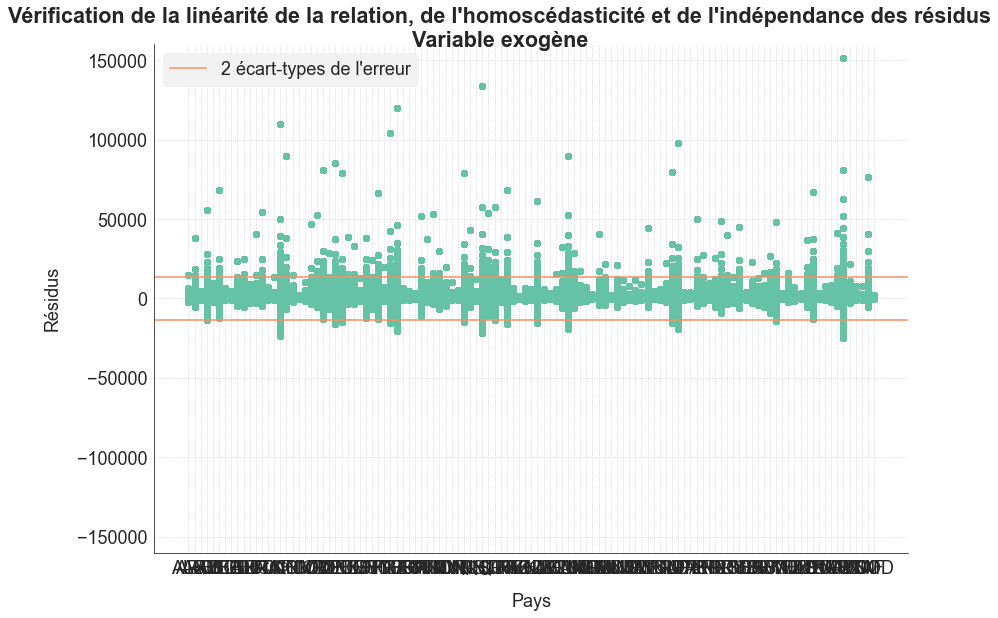

In [13]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariable exogène", is_mono=False)
mygraph.add_plot(data.country_code, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Pays")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova01_04_linearite_homoscedasticite_exo.png")
plt.show()

In [14]:
alpha_homo = 0.05
lm_stat, lm_pvalue, f_stat, f_pvalue = sm.stats.diagnostic.het_breuschpagan(anova.resid, anova.model.exog)
if f_pvalue >= alpha_homo:
    test_result = ["Homoscédasticité acceptée"]
else:
    test_result = ["Homoscédasticité rejetée"]
pd.DataFrame({'H0':["Variance des résidus constante"], 'Statistique':["{:.2f}".format(f_stat)], \
             'p-value':["{:.3f}".format(f_pvalue)], 'Résultat (seuil={:.1%})'.format(alpha_homo):test_result}, index=["Breusch Pagan"])

,H0,Statistique,p-value,Résultat (seuil=5.0%)
Breusch Pagan,Variance des résidus constante,1898.28,0.000,Homoscédasticité rejetée


L'homoscédasticité est rejetée. Ce n'est pas étonnant car on remarque que les résidus sont fortement décalés vers les valeurs très positives. L'absence d'homoscédasticité semble découler directement de la non linéarité de la relation.

**Conclusion sur les hypothèses**

Aucune des trois hypothèses n'est respectée. Par conséquent, ce modèle ne peut pas être utilisé.  
Afin d'obtenir des données modélisables par un modèle linéaire, il faut transformer les données (étape de feature engineering). Les graphiques, qui montrent une relation proche de l'exponentielle, suggèrent de remplacer les revenus par le logarithme des revenus.

**Vérification supplémentaire : absence de colinéarité entre les exogènes**

Avec une seule variable explicative, pas de problème de colinéarité.

**Vérification de la pertinence des estimations par rapport aux valeurs réelles**

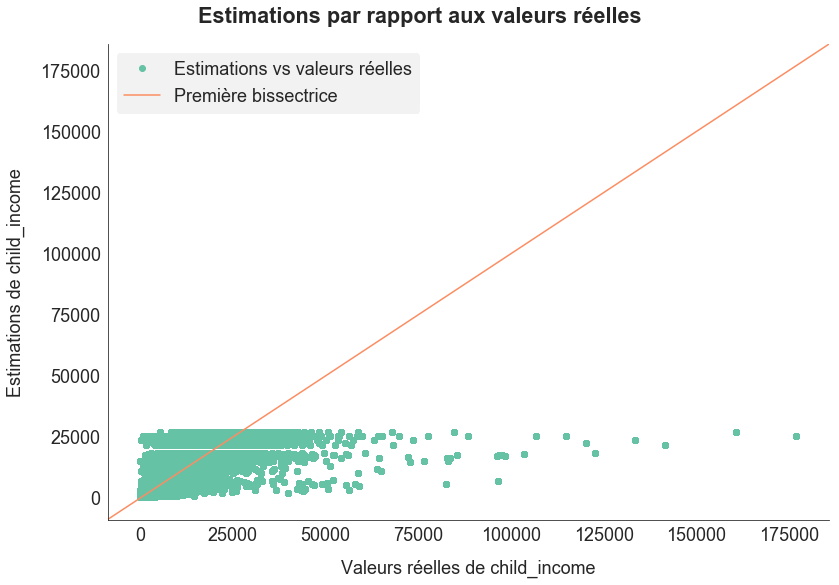

In [15]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data.child_income, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de child_income")
mygraph.set_axe('x', label="Valeurs réelles de child_income")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova01_05_accuracy_graph.png")
plt.show()

Comme les analyses précédentes le supposent, les valeurs élevées de child income sont très mal évaluées par ce modèle. Elles devraient être mieux représentées en prenant le logarithme des revenus (étape de feature engineering).

**Analyse des outliers**

In [16]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [17]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

,0
levier,0.00004005
cook,0.00000071


In [18]:
only_both = False
if only_both == False:
    print("Résumé des observations atypiques OU influentes")
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print(variables_speciales)
    print("")
print("Résumé des observations atypiques ET influentes")
variables_investigation = analyses[analyses.outlier & analyses.influence]
variables_investigation

Résumé des observations atypiques OU influentes
         observation_name   levier  outlier  cook_distance  influence
49349               49349  0.00002    False   8.468724e-07       True
49350               49350  0.00002    False   8.468724e-07       True
49351               49351  0.00002    False   8.468724e-07       True
49352               49352  0.00002    False   8.468724e-07       True
49353               49353  0.00002    False   8.468724e-07       True
49354               49354  0.00002    False   8.468724e-07       True
49355               49355  0.00002    False   8.468724e-07       True
49356               49356  0.00002    False   8.468724e-07       True
49357               49357  0.00002    False   8.468724e-07       True
49358               49358  0.00002    False   8.468724e-07       True
49359               49359  0.00002    False   8.468724e-07       True
49360               49360  0.00002    False   8.468724e-07       True
49361               49361  0.00002    Fals

,observation_name,levier,outlier,cook_distance,influence


Il y a des obervations influentes. Leur nombre (191 078) peut paraître élevé. Mais elles ne représentent que 3,39% de notre échantillon de 5 642 420 individus.  
Aucune observation n'est à la fois atypique et influente. Nous pouvons donc conserver l'ensemble des observations.

### Conclusion sur ce modèle

Les résultats de ce modèle laissent penser que le revenu des individus dépend de leur pays. Cependant, ce modèle n'est pas satisfaisant car il présente un problème de linéarité et d'hétéroscédasticité. L'analyse des résidus suggère d'utiliser le logarithme du revenu des enfants afin de linéariser la relation. Je vérifie cette hypothèse avec une deuxième modélisation.